# Homework 4: Images and Convolution

## Step 1.1

In this module, we explore the Convolution operation. Convolution is a very popular/important operation on matrices that has applications in Natural Language Processing and Computer Vision. Therefore, in this module, we write 2 functions that together perform basic 2D convolution operations given an image and a kernel.


There are lot of online sources that explain 2D convolutions. Some of these are :
http://www.songho.ca/dsp/convolution/convolution2d_example.html
https://www.youtube.com/watch?v=YgtModJ-4cw


The very first function we define is `convolve` that takes two 2D numpy matrices of the same size and performs the convolution operation. It takes as input two arguments, `img_subset` and `kernel`. `img_subset` is the specific region of the image that we apply the `kernel` to. Applying the `kernel` is equivalent to computing a weighted sum, `img_subset` values weighted by the corresponding `kernel` values

In [1]:
# Import your standard Python packages here

import pandas as pd
import numpy as np
!pip install tqdm
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from numpy.random import randint

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Implement the convolve function. 
# Your function should be able to work with matrices of any size

def convolve(mat1,mat2):
    nrow = len(mat1)
    ncol = len(mat1[0])
    input_arr = mat1
    kernel = mat2
    output = 0
    for i in range(0, nrow):
        for j in range(0,ncol):
            output = output + input_arr[i][j]*kernel[i][j]
    return output

In [3]:
# CIS 545 Test Case

a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([[1,0,0],[1,0,0],[1,0,0]])
c = convolve(a,b)

if (c != 12.0):
    raise ValueError('Incorrect value')

In [4]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [5]:
# CIS 545 Test Case


In [6]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [7]:
# CIS 545 Test Case


In [8]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


## Step 1.2

Now that we have the `convolve` function defined, we implement the full convolution method, i.e a function that iteratively apply the kernel across the entire given image. This function will be called `convolveImage` and takes as input 2 arguments, `img` and `kernel`. The function takes the input image and convolves the given kernel across the entire image.

For example, if the size of the kernels provided are 5x5, then essentially, you would be applying the `convolve` operation on every 5x5 sub-region of the input image. For a better understanding of how the `convolveImage` function should work, you can refer to https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1. We want you to implement a standard convolution with a stride of 1 and no padding. 

NOTE : The output of `convolveImage` will not be of the same size as the input image. If this is not immediately clear, we suggest that you think carefully about how the `convolve` function will be applied across the entire image.

In [9]:
# Implement the convolveImage(img,kernel) function here. 
# Again your function should be generic enough to handle
# arguments of any shape

def convolveImage(img, kernel):
    nrow = len(img)
    ncol = len(img[0])
    nrow_kernel = len(kernel)
    ncol_kernel = len(kernel[0])
    output = [[0 for j in range(0,ncol-ncol_kernel+1)] for i in range(0, nrow-nrow_kernel+1)]
#     print(nrow,ncol,nrow_kernel,ncol_kernel)
    for i in range(0, nrow-nrow_kernel+1):
        for j in range(0, ncol-ncol_kernel+1):
            output[i][j]=0
            for m in range(0, nrow_kernel):
                for n in range(0, ncol_kernel):
                    output[i][j] = output[i][j]+img[i+m][j+n]*kernel[m][n]
#     print(output)
    return output
    

In [10]:
# CIS 545 Test Case

a = np.array([[1,2,3],[1,2,3],[1,2,3]])
b = np.array([[1,2],[1,2]])
c = convolveImage(a,b)

if (np.sum(c) != 52.0):
    raise ValueError("Incorrect value")

In [11]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [12]:
# CIS 545 Test Case


In [13]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [14]:
# CIS 545 Test Case


In [15]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [16]:
# CIS 545 Test Case


In [17]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


## Step 2.1: Data visualization

We now load our dataset for this assignment which is in a numpy format. The training data is called `trainData.npy` and the corresponding label file is called `trainTruth.npy`. Similarly, for testing, we have the `testData.npy` and `testTruth.npy` datasets

You should be able to read these datasets in using the `np.load` method.

Load these datasets into variables : `trainx, trainy, testx, testy`

In [18]:
# You can use this cell to install the packages 
# if you don't have them already

In [19]:
# Import these for grading - you don't have to use BytesIO/requests

from io import BytesIO
import numpy as np
import requests

In [20]:
# Load the datasets into trainx, trainy, testx, testy

trainx = np.load('trainData.npy')
trainy = np.load('trainTruth.npy')
testx = np.load('testData.npy')
testy = np.load('testTruth.npy')

The following cell is only for grading purposes - please do not edit it or import data after it, as it may lead to your assignment failing in autograding and having to be regraded.

In [21]:
# Loading datasets for grading
# You won't be able to use this until grading
# Editing this cell may mean your code won't runr

try:
    # trainx
    F = requests.get('https://s3.amazonaws.com/cis545-hw4data/trainData.npy', stream = True)
    trainx = np.load(BytesIO(F.raw.read()))

    # trainy
    F = requests.get('https://s3.amazonaws.com/cis545-hw4data/trainTruth.npy', stream = True)
    trainy = np.load(BytesIO(F.raw.read()))

    # testx
    F = requests.get('https://s3.amazonaws.com/cis545-hw4data/testData.npy', stream = True)
    testx = np.load(BytesIO(F.raw.read()))

    # testy
    F = requests.get('https://s3.amazonaws.com/cis545-hw4data/testTruth.npy', stream = True)
    testy = np.load(BytesIO(F.raw.read()))
except:
    print("AWS S3 not initialized for grading")

In [22]:
# CIS 545 Test Case

if trainx.shape != (300,50,50):
    raise ValueError('Dataset not loaded properly')

In [23]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


The data files contain 3-D matrices with each sample/instance represented by a 2-D matrix. In these matrices, the first index represents the sample number while the last 2 index represent the size of each instance. Therefore, if the shape of trainx is (a,b,c), then you have `a` number of samples in your data with each sample being a 2-D matrix of size `(b,c)`.  

Lets visualize the data to see what exactly it is that we are working with. Using numpy indexing, take out the 6th sample in the training data

NOTE. Use the `plt.imshow()` function to visualize your sample. Also set the `cmap` argument to 'gray' for better visualization.

In [24]:
# Select the 6th sample from the training dataset (trainx) 
# and set it to the variable 'img1'
img1 = trainx[5]

In [25]:
print(img1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


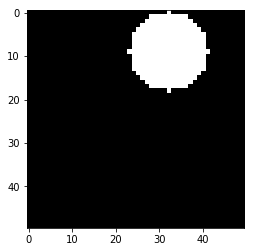

In [26]:
# View the plot
plt.imshow(img1, cmap = 'gray')

In [27]:
# CIS 545 Test Case

if img1.shape != (50,50):
    raise ValueError("Incorrect indexing")

In [28]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [29]:
# CIS 545 Test Case


In [30]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


Now plot the 12th element in the training dataset. Be careful of indexing...

In [31]:
# Select the 12th sample from the training dataset(trainx) and set it to the variable 'img2'
####不确定是不是改写成以下样子
img2 = np.array(trainx[11])
# img2 = img2.reshape((50*12,50))

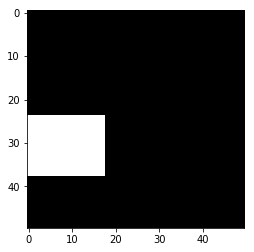

In [32]:
# View the plot
plt.imshow(img2, cmap = 'gray')

In [33]:
# CIS 545 Test Case


In [34]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


Now check for the corresponding values of the 5th and 11th element in `trainy`. Assuming 1 means true and 0 means false, what could these numbers represent? Hint: This dataset contains images with either rectangles or circles embedded in them. 

From your observations, set the variable `circleTruthValue` to the value that a circle image should have in `trainy`. In other words, `circleTruthValue` should be assigned a new value that corresponds to circle items.

In [35]:
# Look at the corresponding images and their truth labels and figure what is the truth label that is used to 
# denote circles in the dataset. Set this value to circleTruthValue

trainy[4]
trainy[10]
circleTruthValue = 0 # change the -1 to the correct number


In [36]:
# CIS 545 Test Case


In [37]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


## Deriving Convolution features

In this module, we derive features for each of the instances in our training data (as well as testing) by applying the convolution operator over each of the instances. These features will then be used to create a Machine Learning model that predicts whether the image contains a rectangle or a circle.

### Step 3.1

The first step in this process is to load the kernels into a variable called `kernels`. Kernels have been provided in a numpy file called `kernels.npy`. This again would be a 3D matrix with the first index representing the kernel number and the next 2 representing the size of the individual kernel. Therefore, if the shape of `kernels` is (a,b,c), then you have `a` kernels in your data with each kernel being a 2-D matrix of size `(b,c)`.  





In [38]:
# Load the kernels.py file and name the variable 'kernels'
kernels = np.load('kernels.npy')

In [39]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [40]:
# Loading for grading similar to above

try:
    # kernels
    F = requests.get('https://s3.amazonaws.com/cis545-hw4data/kernels.npy', stream = True)
    kernels = np.load(BytesIO(F.raw.read()))
except:
    print("AWS S3 not initialized for grading")

In [41]:
# CIS 545 Test Case

if kernels.shape != (8,5,5):
    raise ValueError("Dataset not loaded properly")

In [42]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


### Step 3.2 Visualizing Kernels

Similar to step 2.1, visualize the kernels to understand what exactly the kernels look like. This would help you build up an intuition as to what these kernels try to acheive.

Plot the 5th kernel from the `kernels` variable.

In [43]:
# Set the 5th kernel to the 'img3' variable
img3 = np.array(kernels[4])

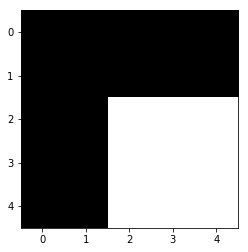

In [44]:
# View the plot
plt.imshow(img3, cmap = 'gray')

### Visualizing the Effect of Convolution with kernels
Now to visualize the effect of convolving an image with a kernel, you can run the next cell to see the input image, the kernel, and the output of the convolution of the kernel on the given image.

In [45]:
# Set 'kernel' to be the 4th element in the kernels variable and 'img4' as the 116th element from trainx

kernel = kernels[3]
img4 = trainx[115]

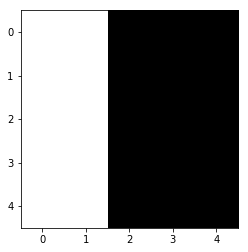

In [46]:
plt.imshow(kernel,cmap='gray')

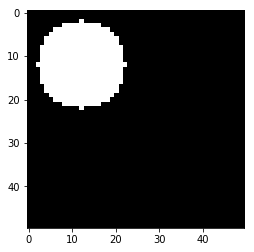

In [47]:
plt.imshow(img4,cmap='gray')

In [48]:
# If this cell doesn't run, likely there's an issue with your functions or setup!
output = convolveImage(img4, kernel)

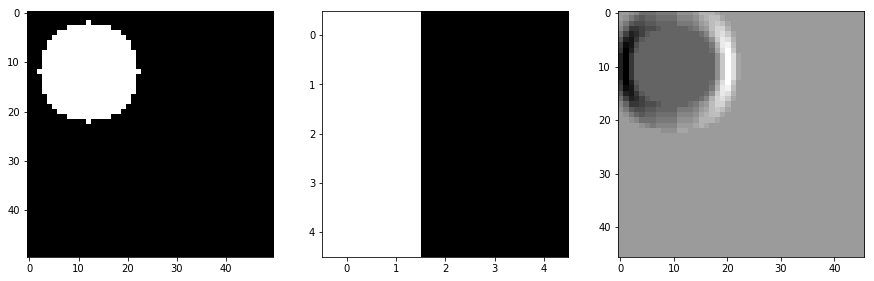

In [49]:
# You should be able to see three plots here

plt.figure(figsize = (15,10))
plt.subplot(131)
plt.imshow(img4, cmap = 'gray')

plt.subplot(132)
plt.imshow(kernel, cmap = 'gray')

plt.subplot(133)
plt.imshow(output, cmap = 'gray')

### Step 3.3: createFeatureVector

In this module, we implement a function called createFeatureVector that takes as input a single image and a set of kernels. 

Its task can be summarized as :
 * Initialize a empty list to store all features for the image
 * For every kernel:
      - apply the `convolveImage` function over the image
      - compute the sum over the output matrix 
      - add the computed sum to the feature list
 * return the list as a numpy array
      
      
As a sanity check, the output of this function should be a numpy array with a length equal to the number of kernels that are passed on to the function. 

In [50]:
# Implement the createFeatureVector(img, kernels) function here. 

def createFeatureVector(img, kernels):
    img_feature = []
    for kernel in kernels:
        #print(kernel)
        result = convolveImage(img, kernel)
        result_sum = sum(sum(i) for i in result)
#         print(result_sum)
        img_feature.append(result_sum)
    return np.array(img_feature)

In [51]:
createFeatureVector(np.ones((7,7)), kernels)

array([  45.,  -27.,   45.,  -45.,  -63., -117.,  -63.,  -63.])

In [52]:
# CIS 545 Test Case

a = createFeatureVector(np.ones((7,7)),kernels)

if (a.shape != (8,)):
    raise ValueError("Incorrect dimensions for createFeatureVector")
    
if (a[1] != -27.0):
    raise ValueError("Incorrect calculation for createFeatureVector")

In [53]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [54]:
# CIS 545 Test Case


In [55]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [56]:
# CIS 545 Test Case


In [57]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


### Step 3.4 featurizeData

The next function, `featurizeData` takes as input your dataset and computes the output of `createFeatureVector` on each of the instances in your dataset. Takes 2 inputs : `dataset` and `kernels`

Output will be a 2-D matrix with each row representing the feature vectors computed for each of the instances in the given dataset

NOTE. The output should be a numpy array



In [58]:
# Implement the featurizeData(dataset, kernels) function here.

def featurizeData(dataset, kernels):
    dataset_feature = []
    for image in dataset:
        result = createFeatureVector(image, kernels).tolist()
        dataset_feature.append(result)
#     print(dataset_feature)
    return np.array(dataset_feature)
            

Now using the featurizeData function defined above, compute the featurized versions of your training and testing data and name them `trainx_feat` and `testx_feat`

In [59]:
# Define trainx_feat and testx_feat here

trainx_feat = featurizeData(trainx, kernels)
testx_feat = featurizeData(testx, kernels)

In [60]:
# CIS 545 Test Case

if (trainx_feat.shape != (300,8)):
    raise ValueError("Incorrect dimensions for featurizeData")
    
if (testx_feat.shape != (100,8)):
    raise ValueError("Incorrect dimensions for featurizeData")

In [61]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [62]:
# CIS 545 Test Case


In [63]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [64]:
# CIS 545 Test Case


In [65]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


## Modeling

In this section, we use the features that we have created and build a Classification model. In particular, we will be using the Random Forest model, which is one of better performing ML models. 

For the following section, you will be using the Random Forest implementation provided by scikit-learn, `RandomForestClassifer`. You would essentially be using 2 methods to train and test the model, `fit` and `predict`. The documenation on RandomForestClassifier should provide you the necessary details for implementing the model. 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Step 4.1 Using Raw Features 

We first train a model using the raw values of the images itself. For this, convert trainx and testx by converting the 2D images into a 1D array. More specifically, your trainx/testx datasets of shape (n,x,y) should be converted into shape (n,x*y).
Stores these new variables as `trainx_raw` and `testx_raw`

In [66]:
# Define trainx_raw and testx_raw here

trainx_raw = trainx.reshape(300,50*50)
testx_raw = testx.reshape(100,50*50)


In [67]:
# CIS 545 Test Case

if (trainx_raw.shape[0] != 300):
    raise ValueError("Incorrect dimensions")
    
if (testx_raw.shape[0] != 100):
    raise ValueError("Incorrect dimensions")

In [68]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


Now fit a random forest model to `trainx_raw`. While defining the RandomForestClassifer, set the `n_estimators` parameter to 100. Name the random forest model `rfModel_raw`.

In [69]:
# Define and train rfModel_raw
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rfModel_raw = rf.fit(trainx_raw, trainy)

In [70]:
print(rfModel_raw)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Now predict for the test dataset `testx_raw` and calculate the accuracy for the prediction. Store the calculated accuracy in `accuracy_raw`

In [71]:
result_raw = rf.predict(testx_raw)

In [72]:
accuracy_raw=accuracy_score(testy, result_raw)

In [73]:
# View accuracy_raw 
accuracy_raw

0.84

In [74]:
# CIS 545 Test Case


In [75]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


### 4.2 Using Convolution features

Now instead of using the raw pixel values, we use the convolution features. Create a new Random forest model called `rfModel_conv` which takes as input `trainx_feat`. 

Set n_estimators to 100 for the RandomForest model.

In [76]:
# Define rfModel_conv here
####为什么convolution可以大大提高准确性呢？
####卷积可以让核心部分突出，边缘部分模糊？
rf = RandomForestClassifier(n_estimators=100)
rfModel_conv = rf.fit(trainx_feat, trainy)

Predict for the `testx` dataset and store the accuracy value in `accuracy_conv`

In [77]:
# Define accuracy_conv here
result_feat = rf.predict(testx_feat)

In [78]:
accuracy_conv=accuracy_score(testy, result_feat)

In [79]:
# View accuracy_conv
accuracy_conv

0.96

In [80]:
# CIS 545 Test Case


In [81]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [82]:
# CIS 545 Test Case


In [83]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


## Variations

We now explore some variations to the data creation process and observe how it affects the model performance.


### Step 5.1 Thresholding

The Visualization in Step 3.2 gives us a good idea about the effect of convolving kernels on images. However, there are ways we can make these effects more stronger.

Write a function called `thresholdImg` that takes as input an image and does the following :
 * All values less than 0 are set to -1
 * All values greater than 0 are set to +1
 * All values equal to 0 are not changed

In [84]:
# Define thresholdImg(img) here

def thresholdImg(img):
    img_ = np.array(img.copy())
#     print(img_)
    img_ [img_<0]= -1.0
    img_ [img_>0]= 1.0
    return img_
#     print(img)

Take the 5th image in `trainx`, convolve it with the 4th element in `kernels`, threshold the output of the convolution using ` thresholdImg` and store the output in `threshOutput`. Also plot `threshOutput`

In [85]:
# Create threshOutput from the various image operations
output = convolveImage(trainx[4],kernels[3])
threshOutput = thresholdImg(output)
# print(threshOutput)

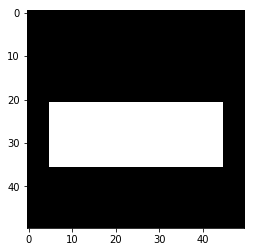

In [86]:
plt.imshow(trainx[4],cmap = 'gray')

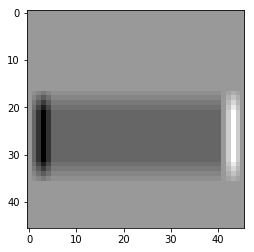

In [87]:
plt.imshow(output, cmap = 'gray')

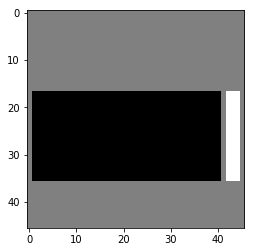

In [88]:
# View the plot
plt.imshow(threshOutput, cmap = 'gray')

In [89]:
# CIS 545 Test Case

if (np.sum(threshOutput) != -703.0):
    raise ValueError("Incorrect sum for threshOutput")

In [90]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


Now that you have seen the effet of thresholding the output of the convolutions, we apply this to all the images in the trainx and testx arrays while we create the featureVectors. In the next cells define the functions `createFeatureVec_thresh` and `featurizeData_thresh`.

These functions essentiatlly are the same as before. The only difference being that `createFeatureVec_thresh` applies the `thresholdImg` function to the output of the convolution before taking the sum. `featurizeData_thresh` does the same function as before with the only difference being that it uses `createFeatureVec_thresh` instead of `createFeatureVec`.



In [91]:
# Define createFeatureVec_thresh here

def createFeatureVector_thresh(img, kernels):
    featurevector_thresh = []
    for kernel in kernels:
        output = convolveImage(img,kernel)
        threshOutput = thresholdImg(output)
        featurevector_thresh.append(sum(sum(i) for i in threshOutput))
    return np.array(featurevector_thresh)
              

In [92]:
# Define featurizeData_thresh here

def featurizeData_thresh(dataset, kernels):
    dataset_feature_thresh = []
    for image in dataset:
        result = createFeatureVector_thresh(image, kernels).tolist()
        dataset_feature_thresh.append(result)
#     print(dataset_feature)
    return np.array(dataset_feature_thresh)

Using these functions, create `trainx_feat_thresh` and `testx_feat_thresh` from the trainx and testx datasets.

In [93]:
# Define trainx_feat_thresh and testx_feat_thresh here

trainx_feat_thresh = featurizeData_thresh(trainx, kernels)
testx_feat_thresh = featurizeData_thresh(testx, kernels)


In [94]:
# CIS 545 Test Case


In [95]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [96]:
# CIS 545 Test Case


In [97]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


Now using the above features, train a new Random Forest model called `rfModel_thresh` that takes as input `trainx_feat_thresh`. Predict on the test dataset and store the accuracy value in `accuracy_thresh`.

In [98]:
# Define rfModel_thresh here. 
# Train the model, predict on testx_feat_thresh and 
# store the accuracy in accuracy_thresh

rf = RandomForestClassifier(n_estimators=100)
rfModel_thresh = rf.fit(trainx_feat_thresh, trainy)
result_feat_thresh = rf.predict(testx_feat_thresh)

In [99]:
accuracy_thresh=accuracy_score(testy, result_feat_thresh)

In [100]:
# View accuracy_thresh here
accuracy_thresh

1.0

In [101]:
# CIS 545 Test Case


In [102]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


### Step 5.2 Additional Summarization

In createFeatureVector, after applying the convolution, we simply summarize the output by taking the sum of the output.

The sum alone is not a very good summarization ( Think about and try to understand why it might be the case). Therefore in addition to the sum, we add 3 more summarization values : min, max and standard deviation. 

In this segment, the only difference you will have to make to the entire pipeline is that within createFeatureVector, instead of storing just the sum for each kernel, store the sum, min value, max value and standard deviation.

min, max , standard deviation can be implemented using the `np.min`, `np.max` and `np.std`.

Make this modification to the modeling pipeline and create a new random forest model called `rfModel2`. Use this new model to make predictions on the corresponding test dataset and store the accuracy of the prediction in `accuracy2`.

*NOTE. You are free to define your own functions. But DO NOT OVERWRITE EXISTING VARIABLES OR FUNCTIONS*

In [103]:
# Define all your working methods and variables here. 
# We are only be evaluation only based on 2 variables :
# rfModel2 and accuracy2
# DO NOT overwrite existing functions!

def createFeatureVector_4d(img, kernels):
    img_feature_4d =[]
    for kernel in kernels:
        #print(kernel)
        result = convolveImage(img, kernel)
        result_sum = np.sum(result)
        result_min = np.min(result)
        result_max = np.max(result)
        result_std = np.std(result)
        img_feature_4d.append(result_sum)
        img_feature_4d.append(result_min)
        img_feature_4d.append(result_max)
        img_feature_4d.append(result_std)
#         print(result_sum)
    return np.array(img_feature_4d)

In [104]:
def featurizeData_4d(dataset, kernels):
    dataset_feature = []
    for image in dataset:
        result = createFeatureVector_4d(image, kernels).tolist()
        dataset_feature.append(result)
#     print(dataset_feature)
    return np.array(dataset_feature)

In [105]:
trainx_feat_4d = featurizeData_4d(trainx, kernels)
testx_feat_4d = featurizeData_4d(testx, kernels)

In [106]:
####这个地方要不要写成rfModel2.predict？
rf = RandomForestClassifier(n_estimators=100)
rfModel2 = rf.fit(trainx_feat_4d, trainy)
result_feat_4d = rf.predict(testx_feat_4d)

In [107]:
accuracy_2=accuracy_score(testy, result_feat_4d)

In [108]:
# CIS 545 Test Case


In [109]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [110]:
# View accuracy_2
accuracy_2

1.0

In [111]:
# CIS 545 Test Case


In [112]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


### Congrats! Homework 4 Images completed!

What you have essentially observed (and partially implemented) is how a Convolutional Neural Network works. CNNs are one of the most popular and best performing models out there, especially for Computer Vision tasks. The different modules in this assignment should give you a good intuition as to what a CNN tries to achieve and why it tends to perform better than vanilla Machine Learning models. 

The advantage of CNNs is its ability to learn meaningful features (`kernels`) that helps it recognise the differences between shapes/objects etc. Thats why just 8 kernels were able to give much better performance than 2500 raw pixel value features.

For a better understanding of CNNs, look at : http://setosa.io/ev/image-kernels/

Now, if you haven't already, move on to the KMeans notebook!